In [1]:
import numpy as np
import h5py
import glob, os, re, sys
import time

import pickle
import random
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from ArtistNames_analysis import ArtistNames

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
cmap = mpl.colormaps['viridis']
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

# analysis for 1000 random artists

In [6]:
start_time = time.time()
data = ArtistNames(rand_num_artist_names=1000, random_seed=100)
print(f"Time to load data: {time.time() - start_time}")

(array([26.,  8.,  5.,  7.,  3.,  6.,  5.,  2.,  4.,  2.,  0.,  2.,  1.,
         0.,  1.,  1.,  1.,  0.,  1.,  1.]),
 array([ 0.  ,  2.85,  5.7 ,  8.55, 11.4 , 14.25, 17.1 , 19.95, 22.8 ,
        25.65, 28.5 , 31.35, 34.2 , 37.05, 39.9 , 42.75, 45.6 , 48.45,
        51.3 , 54.15, 57.  ]),
 [<matplotlib.patches.Polygon at 0x146f7d065640>])

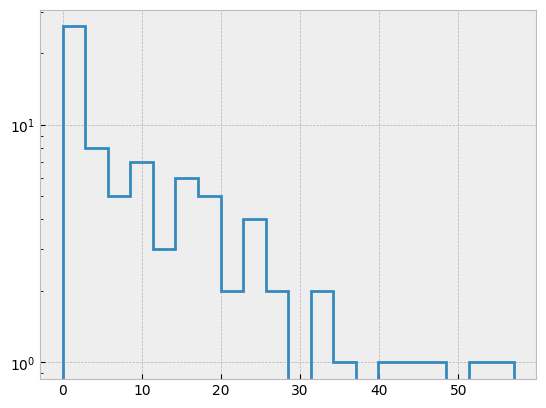

In [11]:
plt.hist(data.artist_info['popularity'], bins=20, histtype='step', lw=2, log=True)

In [13]:
print(data.artist_info['num_releases'])
active_artist_data = data.get_active_artists()
print(active_artist_data['popularity'])

[15, 12, 6, 20, 4, 7, 12, 20, 9, 7, 4, 8, 10, 9, 4, 1, 4, 5, 18, 0, 1, 0, 2, 1, 20, 1, 0, 6, 1, 0, 3, 20, 20, 4, 2, 20, 6, 9, 7, 0, 7, 0, 5, 13, 0, 1, 0, 20, 5, 1, 6, 0, 1, 18, 1, 2, 1, 0, 7, 0, 0, 3, 2, 5, 2, 0, 0, 20, 20, 0, 2, 1, 20, 20, 2, 16]


TypeError: '>' not supported between instances of 'NoneType' and 'int'